# 客户流失管理

## 实验目的

（一）熟悉真实数据探索过程

（二）熟悉真实数据可视化基本操作

（三）熟悉真实数据预处理过程

（四）熟悉常用分类算法建模

（五）熟悉分类模型评价指标

## 具体代码

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
#设置plt输出svg格式的图片
display.set_matplotlib_formats("svg")

# 用pandas读取数据, delimiter为设置字段分隔符
data = pd.read_csv('D:/CODE/Python/Data_mining/3.4.5/churn_training.txt', delimiter='\t')
test = pd.read_csv('D:/CODE/Python/Data_mining/3.4.5/churn_test.txt', delimiter='\t')

C:\Users\LLeavee\AppData\Local\Temp\ipykernel_8028\1034332748.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


### 数据探索

In [3]:
# 查看数据大小
print(data.shape)

(2000, 21)


In [4]:
# 查看头几行数据内容
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
2,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
3,AL,118,510,391-8027,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
4,LA,117,408,335-4719,0,0,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0


In [5]:
# 检查数据类型
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [6]:
# 查看数据总结
data.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,100.44550,437.32000,0.106500,0.280500,8.209000,178.652850,100.456500,30.371530,201.650750,100.066000,17.140485,200.461300,99.957000,9.020830,10.224950,4.477000,2.761180,1.577500,0.145000
std,39.55121,42.40338,0.308554,0.449356,13.755433,54.369621,20.375271,9.242837,50.608857,20.030383,4.301777,50.086001,19.459792,2.253906,2.758149,2.487482,0.744709,1.321691,0.352189
min,1.00000,408.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,415.00000,0.000000,0.000000,0.000000,142.975000,87.000000,24.305000,167.400000,87.000000,14.230000,167.275000,87.000000,7.527500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.00000,415.00000,0.000000,0.000000,0.000000,178.150000,101.000000,30.285000,202.350000,100.000000,17.200000,201.600000,100.000000,9.070000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,126.00000,510.00000,0.000000,1.000000,20.000000,216.000000,114.000000,36.720000,235.500000,113.000000,20.020000,233.725000,113.000000,10.520000,12.000000,6.000000,3.240000,2.000000,0.000000
max,232.00000,510.00000,1.000000,1.000000,49.000000,346.800000,165.000000,58.960000,361.800000,168.000000,30.750000,381.900000,175.000000,17.190000,18.300000,20.000000,4.940000,9.000000,1.000000


### 数据预处理

对出现三成以上空数据的列进行清洗

In [7]:
null_num = data.isnull().sum() # 每列空数据的数量求和
data.columns[null_num < len(data) * 0.3] # 选中列白名单

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

看起来并没有数据被删除

In [8]:
# 根据名单清除数据
data.drop(columns=data.columns[null_num >= len(data) * 0.3], inplace=True)

清洗非数值类数据

In [9]:
# # 选中非object数据
# numeric_cols = list(data.select_dtypes(exclude='object').columns)
# numeric_cols
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [10]:
# 选中object数据
string_cols = list(data.select_dtypes(include='object').columns)
string_cols

['state', 'phone_number']

In [11]:
# 清洗掉object数据
data.drop(columns=string_cols, axis=1, inplace=True)
test.drop(columns=string_cols, axis=1, inplace=True)
print(data.columns, '\n', test.columns)

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'class'],
      dtype='object') 
 Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'class'],
      dtype='object')


查看当前数据信息

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 2000 non-null   int64  
 1   area_code                      2000 non-null   int64  
 2   international_plan             2000 non-null   int64  
 3   voice_mail_plan                2000 non-null   int64  
 4   number_vmail_messages          2000 non-null   int64  
 5   total_day_minutes              2000 non-null   float64
 6   total_day_calls                2000 non-null   int64  
 7   total_day_charge               2000 non-null   float64
 8   total_eve_minutes              2000 non-null   float64
 9   total_eve_calls                2000 non-null   int64  
 10  total_eve_charge               2000 non-null   float64
 11  total_night_minutes            2000 non-null   float64
 12  total_night_calls              2000 non-null   i

我们可以看看用户流失与否与其拨打客服电话的次数有没有关系

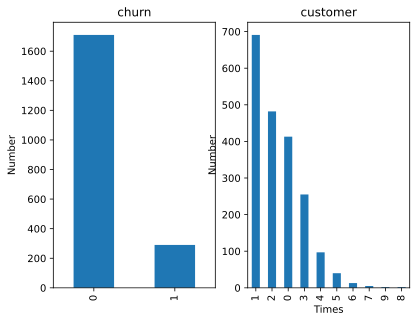

In [13]:
fig = plt.figure(1) # 创建画板

plt.subplot2grid((1,2), (0,0)) # 创建画纸(将画板分成几部分并选择画纸存在位置)
data['class'].value_counts().plot(kind='bar') 
plt.title('churn')
plt.ylabel('Number')

plt.subplot2grid((1,2), (0,1)) # 创建画纸
data['number_customer_service_calls'].value_counts().plot(kind='bar')
plt.title('customer')
plt.ylabel('Number')
plt.xlabel('Times')

plt.show()

查看每日数据

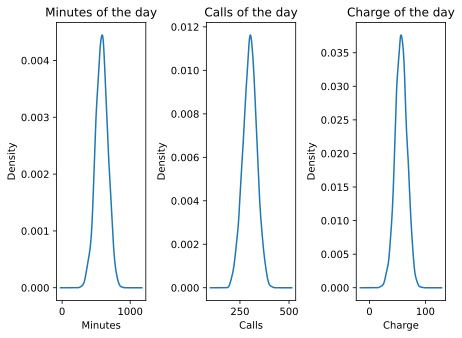

In [14]:
fig = plt.figure(2)

# 计算一整天的数据
minutes = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
calls = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
charge = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']

plt.subplot(131)
minutes.plot(kind='kde') # kde用于绘制频率密度图
plt.title('Minutes of the day')
plt.ylabel('Density')
plt.xlabel('Minutes')

plt.subplot(132)
calls.plot(kind='kde')
plt.title('Calls of the day')
plt.ylabel('Density')
plt.xlabel('Calls')

plt.subplot(133)
charge.plot(kind='kde')
plt.title('Charge of the day')
plt.ylabel('Density')
plt.xlabel('Charge')

fig.tight_layout() # 解决子图间距问题
plt.show()

### 特征选择

皮尔逊相关系数

In [15]:
from scipy.stats import pearsonr

X = data.iloc[:,0:18]
y = data.iloc[:,-1]

print("分析结果如下：")
for i in range(18):
    print(X.columns[i], ':')
    print(pearsonr(X.values[:,i], y))

# p1 = pearsonr(X.values[:,0], y)
# p2 = pearsonr(X.values[:,1], y)
# p3 = pearsonr(X.values[:,4], y)
# print(p1)
# print(p2)
# print(p3)

分析结果如下：
account_length :
PearsonRResult(statistic=-0.002197696496794091, pvalue=0.9217554983858801)
area_code :
PearsonRResult(statistic=0.004260869014523302, pvalue=0.8489693779218356)
international_plan :
PearsonRResult(statistic=0.2675279155123752, pvalue=4.00228722080214e-34)
voice_mail_plan :
PearsonRResult(statistic=-0.07695394574552458, pvalue=0.0005722393998506691)
number_vmail_messages :
PearsonRResult(statistic=-0.06749257265499939, pvalue=0.002528444389568803)
total_day_minutes :
PearsonRResult(statistic=0.20397758736823213, pvalue=3.157144447950781e-20)
total_day_calls :
PearsonRResult(statistic=-0.005882655278240445, pvalue=0.7926136712544987)
total_day_charge :
PearsonRResult(statistic=0.20397367348483383, pvalue=3.1624626305418186e-20)
total_eve_minutes :
PearsonRResult(statistic=0.06917730138067177, pvalue=0.0019649625703280177)
total_eve_calls :
PearsonRResult(statistic=0.00034463434662793113, pvalue=0.9877107646812567)
total_eve_charge :
PearsonRResult(statistic=0.069

卡方检验

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 选出前k个与标签最相关的特征
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# 可视化
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]  # 列命名
featureScores.nlargest(10, "Score")  # 打印排名前十的特征

,Specs,Score
5,total_day_minutes,1376.196189
7,total_day_charge,233.940269
4,number_vmail_messages,209.885776
2,international_plan,127.897709
8,total_eve_minutes,121.504748
17,number_customer_service_calls,100.762035
15,total_intl_calls,17.993577
11,total_night_minutes,12.471286
10,total_eve_charge,10.324137
3,voice_mail_plan,8.521628


递归特征消除

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# 对训练数据进行标准化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# 创建一个SVC对象svc,使用线性核函数,并设置正则化参数C为1。这里使用支持向量机作为特征选择器的评估器。
svc = SVC(kernel="linear", C=1)
# 创建一个RFE对象rfe,设置评估器为svc,指定每次选代选择1个特征,设置步长为1。
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_std, y.values)
# 获取特征的排名
print(rfe.ranking_)

[11 18 15 13 10  7 17  8  4 12  3  6 16  5  1 14  2  9]


LASSO 回归

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# 创建一个标准化器对象scaler，用于将特征进行标准化。
scaler = StandardScaler()
scaler.fit(X.fillna(0))
# 创建一个SelectFromModel对象sel_，使用Lasso回归作为基础模型，并设置正则化参数alpha为100。
sel_ = SelectFromModel(Lasso(alpha=100))
# 使用标准化后的训练集特征和目标变量进行特征选择，使用fit方法拟合数据
sel_.fit(scaler.transform(X.fillna(0)), y)
# 创建一个包含被选择特征的列表并打印输出
selected_feat = X.columns[(sel_.get_support())]
print(selected_feat)

Index([], dtype='object')


### 特征规约

进行PCA降维(为了后面建模时可用，此处训练数据的映射矩阵将直接用于测试数据进行降维)

In [19]:
import numpy as np
from sklearn.decomposition import PCA

X = data.iloc[:,0:18]
y = data.iloc[:,-1]
X_test = test.iloc[:,0:18]
y_test = test.iloc[:,-1]
pca = PCA(n_components=10)  # 这里的10是希望保留的主成分数量
X = pca.fit_transform(X)
mapping_matrix = pca.components_
X_test = pca.transform(X_test)

# 打印降维后的数据
print(X)

[[ -86.01278349   -0.29508701   48.21297503 ...   -7.48283191
    17.06759279    0.5465    ]
 [-124.05935218  135.14485366   21.77555672 ...  -13.32995331
    -8.41851798    3.46920813]
 [  10.3344069    52.30877375   -4.89621013 ...   14.32513238
    -6.84603412    0.34483815]
 ...
 [   2.17159707  -89.61042842  -16.89946835 ...    6.1215245
    -9.64182524   -4.0349618 ]
 [ -39.09181172   56.56836766  -61.57422784 ...   41.69988751
    -8.66088386    4.37096218]
 [ -53.29913863  -71.90385974   38.51565656 ...  -14.54252574
    16.27765951   -3.29598501]]


KernelPCA

In [20]:
from sklearn.decomposition import KernelPCA

def kpca(X, k, g):
    kp = KernelPCA(n_components=k, kernel='rbf', gamma=g)
    X_kpca = kp.fit_transform(X)
    print(X_kpca)

kpca(X_std, 10, 15)

[[-0.00070873 -0.00070098 -0.00071575 ... -0.00071516 -0.00075287
  -0.00071245]
 [-0.00070873 -0.00070098 -0.00071575 ... -0.0007147  -0.00075282
  -0.00071224]
 [-0.00070873 -0.00070098 -0.00071575 ... -0.00071514 -0.00075286
  -0.00071244]
 ...
 [-0.00070873 -0.00070098 -0.00071575 ... -0.00071514 -0.00075287
  -0.00071243]
 [-0.00070873 -0.00070098 -0.00071575 ... -0.00071514 -0.00075287
  -0.00071243]
 [-0.00070873 -0.00070098 -0.00071575 ... -0.00071514 -0.00075287
  -0.00071243]]


### 决策树模型

用PCA规约的数据进行建模(gini)

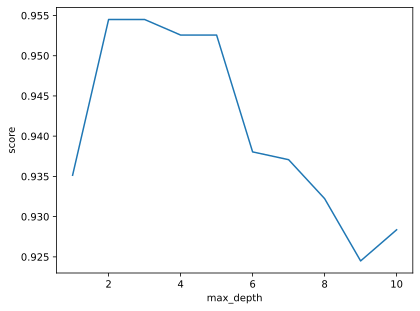

In [21]:
from sklearn.tree import DecisionTreeClassifier

y_axis = []
for i in range(0, 10):
    clf = DecisionTreeClassifier(
        criterion="gini",  # 划分标准使用基尼系数
        random_state=30,  # 用于控制随机性的种子值，固定该值可以使结果可复现。
        max_depth=i+1,  # 决策树的最大深度
        min_samples_leaf=1,  # 叶子结点所需最小样本数
        min_samples_split=5,  # 进行拆分所需的最小样本数
    )
    clf = clf.fit(X, y)  # 拟合模型
    score = clf.score(X_test, y_test) # 评测分数(学习曲线)
    y_axis.append(score)
fig = plt.figure(3)
plt.plot(range(1, 11), y_axis) 
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show() # 图中可以看出决策树深度为2或3的时候训练模型拟合程度较好

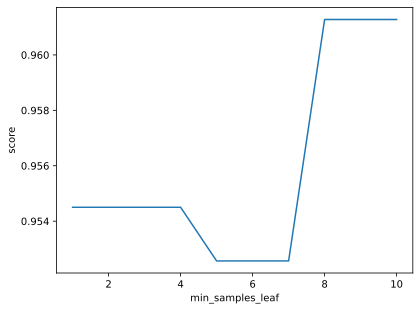

In [22]:
y_axis = []
for i in range(0, 10):
    clf = DecisionTreeClassifier(
        criterion="gini",  # 划分标准使用基尼系数
        random_state=30,  # 用于控制随机性的种子值，固定该值可以使结果可复现。
        max_depth=3,  # 决策树的最大深度
        min_samples_leaf=i+1,  # 叶子结点所需最小样本数
        min_samples_split=5,  # 进行拆分所需的最小样本数
    )
    clf = clf.fit(X, y)  # 拟合模型
    score = clf.score(X_test, y_test) # 评测分数(学习曲线)
    y_axis.append(score)
fig = plt.figure(4)
plt.plot(range(1, 11), y_axis) 
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()

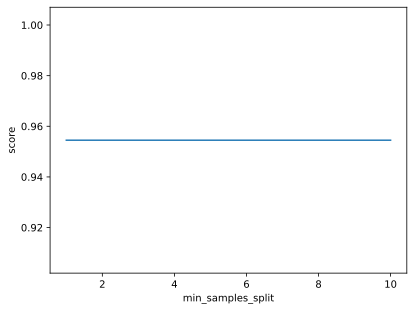

In [23]:
y_axis = []
for i in range(0, 10):
    clf = DecisionTreeClassifier(
        criterion="gini",  # 划分标准使用基尼系数
        random_state=30,  # 用于控制随机性的种子值，固定该值可以使结果可复现。
        max_depth=3,  # 决策树的最大深度
        min_samples_leaf=1,  # 叶子结点所需最小样本数
        min_samples_split=i+2,  # 进行拆分所需的最小样本数
    )
    clf = clf.fit(X, y)  # 拟合模型
    score = clf.score(X_test, y_test) # 评测分数(学习曲线)
    y_axis.append(score)
fig = plt.figure(5)
plt.plot(range(1, 11), y_axis) 
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

### K-近邻算法

[0 0 0 ... 0 0 0]
0.9661181026137464


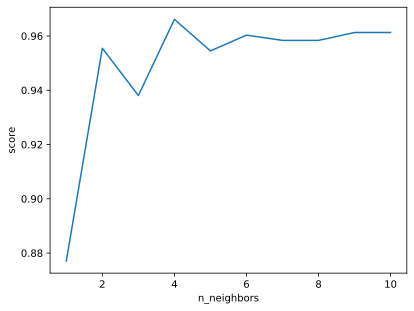

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# 创建k-近邻分类器对象clf,设置近邻数k为3。
clf = KNeighborsClassifier(n_neighbors=4)
# 使用训练集对分类器进行拟合
clf.fit(X, y)
# 使用测试集进行预测
y_pre = clf.predict(X_test)
# 打印预测结果
print(y_pre)
# # 将预测结果输出为csv文件
# np.savetxt('D:/CODE/Python/Data_mining/3.4.5/task1.csv', y_pre, delimiter=',')
# 打印预测准确率
print(clf.score(X_test, y_test))


# 使用for循环进行参数调优
y_axis = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X, y)
    score = clf.score(X_test, y_test)
    y_axis.append(score)
fig = plt.figure(6)
plt.plot(range(1, 11), y_axis)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

### 逻辑斯蒂模型

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 设置参数组合
param_grid = {
    'C':[0.1, 1, 10], # 正则化强度
    'penalty': ['l1', 'l2'], # 正则化项
}

# 创建LogisticRegression模型
logistic = LogisticRegression(solver='liblinear')
# 使用GridSearchCV搜索最佳参数组合
clf = GridSearchCV(logistic, param_grid, verbose=3)
best_model = clf.fit(X, y)
# 输出最佳参数组合和对应的得分
print("Best parameters:", best_model.best_params_)
print("Best score:", best_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................C=0.1, penalty=l1;, score=0.860 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1;, score=0.868 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l1;, score=0.855 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.858 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l1;, score=0.858 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.860 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.868 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.855 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.858 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.858 total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.860 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l1;,

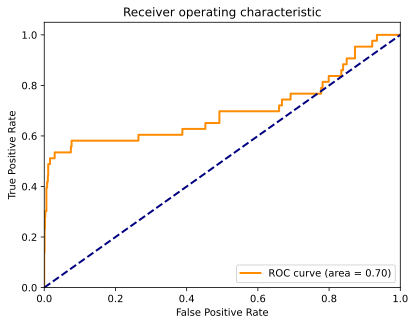

In [26]:
# 画ROC曲线
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 获得测试集预测概率
y_pre_proba = best_model.predict_proba(X_test)[:, 1]
# 计算fpr和tpr和阈值
fpr, tpr, thresholds = roc_curve(y_test, y_pre_proba)
# 计算auc
roc_auc = auc(fpr, tpr)

# 画ROC曲线
plt.figure(7)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # 画对角线
plt.xlim([0.0, 1.0]) # 设置x轴范围
plt.ylim([0.0, 1.05]) # 设置y轴范围
plt.xlabel('False Positive Rate') # 设置x轴标签
plt.ylabel('True Positive Rate') # 设置y轴标签
plt.title('Receiver operating characteristic') # 设置标题
plt.legend(loc="lower right") # 设置图例位置
plt.show()

### 朴素贝叶斯

In [27]:
import numpy as np 
from sklearn.naive_bayes import GaussianNB

X = data.iloc[:,0:18]
y = data.iloc[:,-1]
X_test = test.iloc[:,0:18]
y_test = test.iloc[:,-1]
clf = GaussianNB()
clf.fit(X, y)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

[0 1 1 ... 0 0 0]
0.9080348499515973


In [33]:
import numpy as np 
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1)
clf.fit(X, y)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

[1 1 0 ... 0 1 0]
0.6621490803484995


In [29]:
import numpy as np 
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X, y)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

[0 0 0 ... 0 0 0]
0.957405614714424


In [30]:
from sklearn.naive_bayes import ComplementNB
clf - ComplementNB()
clf.fit(X, y)
print(clf.predict(X_test))

[0 0 0 ... 0 0 0]
0.957405614714424


### 支持向量机

### 神经网络